# Phi variations

The Greek letter Phi is used throughout Greece, maths, physics, and computing. 

In Julia, the Golden Ratio Phi, 1.618... is available as the constant `MathConstants.golden`. It's known as the `\\varphi` character, and you can type it in the REPL with the LATEX completion `\\varphi`. The Unicode character code of this is `03c6`. 

There are about 20 different versions of the phi character in the Unicode tables. If you run this code you'll see the versions for the current font. (In a Jupyter notebook the font is probably Courier; in Atom/Juno it's the theme font you've set in preferences; in a Terminal it's whatever you've chosen.) On macOS, though, font fallbacks are used: if the current font doesn't have a glyph for a character, then other fonts are searched until  a suitable glyph is found.

In [1]:
using DataFrames

df = DataFrame(unicodepoint=Int64[], unicodepointhex=String[], unicodechar=String[], latexcompletion=String[], desc=String[])

for i in (
    [0x00278, "ɸ", "\\ltphi", "Latin Small Letter Phi"] ,
    [0x003C6, "φ", "\\varphi", "Greek Small Letter Phi"] ,
    [0x003D5, "ϕ", "\\phi", "Greek Phi Symbol / Greek Small Letter Script Phi"] ,
    [0x01D60, "ᵠ", "\\^phi", "Modifier Letter Small Greek Phi"] ,
    [0x01D69, "ᵩ", "\\_phi", "Greek Subscript Small Letter Phi"] ,
    [0x1D6D7, "𝛗", "\\bfvarphi", "Mathematical Bold Small Phi"] ,
    [0x1D6DF, "𝛟", "\\bfphi", "Mathematical Bold Phi Symbol"] ,
    [0x1D711, "𝜑", "\\itphi", "Mathematical Italic Small Phi"] ,
    [0x1D719, "𝜙", "\\itvarphi", "Mathematical Italic Phi Symbol"] ,
    [0x1D74B, "𝝋", "\\biphi", "Mathematical Bold Italic Small Phi"] ,
    [0x1D753, "𝝓", "\\bivarphi", "Mathematical Bold Italic Phi Symbol"] ,
    [0x1D785, "𝞅", "\\bsansphi", "Mathematical Sans-Serif Bold Small Phi"] ,
    [0x1D78D, "𝞍", "\\bsansvarphi", "Mathematical Sans-Serif Bold Phi Symbol"] ,
    [0x1D7BF, "𝞿", "\\bisansphi", "Mathematical Sans-Serif Bold Italic Small Phi"] ,
    [0x1D7C7, "𝟇", "\\bisansvarphi", "Mathematical Sans-Serif Bold Italic Phi Symbol"])
    push!(df, (i[1], string(i[1], base=16), string(Char(i[1])), i[3], i[4]))
end

begin
    println(join(rpad.(("Phi", "UNICODE", "LATEX", "UNICODE DESCRIPTION"), (10, 10, 20, 30))))
    for r in eachrow(df)
        println(join(rpad.((r[3], r[2], r[4], r[5]), (10, 10, 20, 30))))
    end
end

In [3]:
MathConstants.golden

φ = 1.6180339887498...

In [4]:
string(Int("φ"[1]), base=16)

"3c6"

## Phi and varphi

This `\\varphi` version of Phi is called "the loopy" version in the Unicode documentation:

(http://unicode.org/reports/tr25/)

>For mathematical and technical use, the straight form φ of the small phi is an important symbol (TEX \phi U+03D5) and needs to be consistently distinguishable from the loopy form (TEX \varphi U+03C6). The straight form phi glyph ϕ is used as the representative glyph for the phi symbol at U+03D5 to satisfy this distinction.

>... U+03C6 ... should be reserved for codes or entities that represent the small phi as used in ordinary Greek text.

Most fonts draw the loopy Phi glyph using a loop, but a few fonts don't make the distinction. 

## Font variations: first attempt

It would be nice to display these various phi characters in different fonts. You'd think such a task was easy, but I'd disagree.

My first attempt is some code running in Jupyter/IJulia which shows the phi glyphs in some of the fonts that I've got installed. 

The problem here is that the browser can't access the installed fonts. I believe this is is combination of browser sandboxing and Apple's recent (2018) introduction of the 'feature' that prevents the Safari browser from accessing locally installed fonts. I get different but similarly inadequate results using Firefox. 

In [5]:
struct HTML #stolen from an old @stevengj notebook and then stolen from @jiahao's github issue
   s::String
end

import Base.show
show(io::IO, ::MIME"text/html", x::HTML) = print(io, x.s)

for font in [
        "Anonymous Pro", 
        "Consolas", 
        "Courier New", 
        "Courier", 
        "DejaVu Sans Mono",
        "DejaVuSansMono", 
        "EnvyCodeR",
        "EversonMono",
        "FedraMono-Book",
        "FiraCode-Regular",
        "GoMono",
        "Hack-Regular", 
        "Helvetica", 
        "Inconsolata", 
        "InputMono", 
        "LucidaConsole", 
        "LucidaSansUnicode", 
        "Menlo", 
        "Monaco",
        "Osaka", 
        "Pragmata Pro", 
        "PragmataPro Regular",
        "PragmataPro-Regular", 
        "PTMono-Regular", 
        "Times", 
        "Ubuntu Mono", 
        "UbuntuMono-Regular",
        "Victor Mono", 
        "Vitesse", 
        "Zapfino"]
    display(HTML("""    <font size="3em", face=$font>$font</font>: 
            \\phi     = <font size="5em", face="$font">ϕ</font>,
            \\Phi     = <font size="5em", face="$font">Φ</font>,
            \\textphi = <font size="5em", face="$font">ɸ</font>,
            \\varphi  = <font size="5em", face="$font">φ</font>
            <br />"""))
end

HTML("    <font size=\"3em\", face=Anonymous Pro>Anonymous Pro</font>: \n\\phi     = <font size=\"5em\", face=\"Anonymous Pro\">ϕ</font>,\n\\Phi     = <font size=\"5em\", face=\"Anonymous Pro\">Φ</font>,\n\\textphi = <font size=\"5em\", face=\"Anonymous Pro\">ɸ</font>,\n\\varphi  = <font size=\"5em\", face=\"Anonymous Pro\">φ</font>\n<br />")

HTML("    <font size=\"3em\", face=Consolas>Consolas</font>: \n\\phi     = <font size=\"5em\", face=\"Consolas\">ϕ</font>,\n\\Phi     = <font size=\"5em\", face=\"Consolas\">Φ</font>,\n\\textphi = <font size=\"5em\", face=\"Consolas\">ɸ</font>,\n\\varphi  = <font size=\"5em\", face=\"Consolas\">φ</font>\n<br />")

HTML("    <font size=\"3em\", face=Courier New>Courier New</font>: \n\\phi     = <font size=\"5em\", face=\"Courier New\">ϕ</font>,\n\\Phi     = <font size=\"5em\", face=\"Courier New\">Φ</font>,\n\\textphi = <font size=\"5em\", face=\"Courier New\">ɸ</font>,\n\\varphi  = <font size=\"5em\", face=\"Courier New\">φ</font>\n<br />")

HTML("    <font size=\"3em\", face=Courier>Courier</font>: \n\\phi     = <font size=\"5em\", face=\"Courier\">ϕ</font>,\n\\Phi     = <font size=\"5em\", face=\"Courier\">Φ</font>,\n\\textphi = <font size=\"5em\", face=\"Courier\">ɸ</font>,\n\\varphi  = <font size=\"5em\", face=\"Courier\">φ</font>\n<br />")

HTML("    <font size=\"3em\", face=DejaVu Sans Mono>DejaVu Sans Mono</font>: \n\\phi     = <font size=\"5em\", face=\"DejaVu Sans Mono\">ϕ</font>,\n\\Phi     = <font size=\"5em\", face=\"DejaVu Sans Mono\">Φ</font>,\n\\textphi = <font size=\"5em\", face=\"DejaVu Sans Mono\">ɸ</font>,\n\\varphi  = <font size=\"5em\", face=\"DejaVu Sans Mono\">φ</font>\n<br />")

HTML("    <font size=\"3em\", face=DejaVuSansMono>DejaVuSansMono</font>: \n\\phi     = <font size=\"5em\", face=\"DejaVuSansMono\">ϕ</font>,\n\\Phi     = <font size=\"5em\", face=\"DejaVuSansMono\">Φ</font>,\n\\textphi = <font size=\"5em\", face=\"DejaVuSansMono\">ɸ</font>,\n\\varphi  = <font size=\"5em\", face=\"DejaVuSansMono\">φ</font>\n<br />")

HTML("    <font size=\"3em\", face=EnvyCodeR>EnvyCodeR</font>: \n\\phi     = <font size=\"5em\", face=\"EnvyCodeR\">ϕ</font>,\n\\Phi     = <font size=\"5em\", face=\"EnvyCodeR\">Φ</font>,\n\\textphi = <font size=\"5em\", face=\"EnvyCodeR\">ɸ</font>,\n\\varphi  = <font size=\"5em\", face=\"EnvyCodeR\">φ</font>\n<br />")

HTML("    <font size=\"3em\", face=EversonMono>EversonMono</font>: \n\\phi     = <font size=\"5em\", face=\"EversonMono\">ϕ</font>,\n\\Phi     = <font size=\"5em\", face=\"EversonMono\">Φ</font>,\n\\textphi = <font size=\"5em\", face=\"EversonMono\">ɸ</font>,\n\\varphi  = <font size=\"5em\", face=\"EversonMono\">φ</font>\n<br />")

HTML("    <font size=\"3em\", face=FedraMono-Book>FedraMono-Book</font>: \n\\phi     = <font size=\"5em\", face=\"FedraMono-Book\">ϕ</font>,\n\\Phi     = <font size=\"5em\", face=\"FedraMono-Book\">Φ</font>,\n\\textphi = <font size=\"5em\", face=\"FedraMono-Book\">ɸ</font>,\n\\varphi  = <font size=\"5em\", face=\"FedraMono-Book\">φ</font>\n<br />")

HTML("    <font size=\"3em\", face=FiraCode-Regular>FiraCode-Regular</font>: \n\\phi     = <font size=\"5em\", face=\"FiraCode-Regular\">ϕ</font>,\n\\Phi     = <font size=\"5em\", face=\"FiraCode-Regular\">Φ</font>,\n\\textphi = <font size=\"5em\", face=\"FiraCode-Regular\">ɸ</font>,\n\\varphi  = <font size=\"5em\", face=\"FiraCode-Regular\">φ</font>\n<br />")

HTML("    <font size=\"3em\", face=GoMono>GoMono</font>: \n\\phi     = <font size=\"5em\", face=\"GoMono\">ϕ</font>,\n\\Phi     = <font size=\"5em\", face=\"GoMono\">Φ</font>,\n\\textphi = <font size=\"5em\", face=\"GoMono\">ɸ</font>,\n\\varphi  = <font size=\"5em\", face=\"GoMono\">φ</font>\n<br />")

HTML("    <font size=\"3em\", face=Hack-Regular>Hack-Regular</font>: \n\\phi     = <font size=\"5em\", face=\"Hack-Regular\">ϕ</font>,\n\\Phi     = <font size=\"5em\", face=\"Hack-Regular\">Φ</font>,\n\\textphi = <font size=\"5em\", face=\"Hack-Regular\">ɸ</font>,\n\\varphi  = <font size=\"5em\", face=\"Hack-Regular\">φ</font>\n<br />")

HTML("    <font size=\"3em\", face=Helvetica>Helvetica</font>: \n\\phi     = <font size=\"5em\", face=\"Helvetica\">ϕ</font>,\n\\Phi     = <font size=\"5em\", face=\"Helvetica\">Φ</font>,\n\\textphi = <font size=\"5em\", face=\"Helvetica\">ɸ</font>,\n\\varphi  = <font size=\"5em\", face=\"Helvetica\">φ</font>\n<br />")

HTML("    <font size=\"3em\", face=Inconsolata>Inconsolata</font>: \n\\phi     = <font size=\"5em\", face=\"Inconsolata\">ϕ</font>,\n\\Phi     = <font size=\"5em\", face=\"Inconsolata\">Φ</font>,\n\\textphi = <font size=\"5em\", face=\"Inconsolata\">ɸ</font>,\n\\varphi  = <font size=\"5em\", face=\"Inconsolata\">φ</font>\n<br />")

HTML("    <font size=\"3em\", face=InputMono>InputMono</font>: \n\\phi     = <font size=\"5em\", face=\"InputMono\">ϕ</font>,\n\\Phi     = <font size=\"5em\", face=\"InputMono\">Φ</font>,\n\\textphi = <font size=\"5em\", face=\"InputMono\">ɸ</font>,\n\\varphi  = <font size=\"5em\", face=\"InputMono\">φ</font>\n<br />")

HTML("    <font size=\"3em\", face=LucidaConsole>LucidaConsole</font>: \n\\phi     = <font size=\"5em\", face=\"LucidaConsole\">ϕ</font>,\n\\Phi     = <font size=\"5em\", face=\"LucidaConsole\">Φ</font>,\n\\textphi = <font size=\"5em\", face=\"LucidaConsole\">ɸ</font>,\n\\varphi  = <font size=\"5em\", face=\"LucidaConsole\">φ</font>\n<br />")

HTML("    <font size=\"3em\", face=LucidaSansUnicode>LucidaSansUnicode</font>: \n\\phi     = <font size=\"5em\", face=\"LucidaSansUnicode\">ϕ</font>,\n\\Phi     = <font size=\"5em\", face=\"LucidaSansUnicode\">Φ</font>,\n\\textphi = <font size=\"5em\", face=\"LucidaSansUnicode\">ɸ</font>,\n\\varphi  = <font size=\"5em\", face=\"LucidaSansUnicode\">φ</font>\n<br />")

HTML("    <font size=\"3em\", face=Menlo>Menlo</font>: \n\\phi     = <font size=\"5em\", face=\"Menlo\">ϕ</font>,\n\\Phi     = <font size=\"5em\", face=\"Menlo\">Φ</font>,\n\\textphi = <font size=\"5em\", face=\"Menlo\">ɸ</font>,\n\\varphi  = <font size=\"5em\", face=\"Menlo\">φ</font>\n<br />")

HTML("    <font size=\"3em\", face=Monaco>Monaco</font>: \n\\phi     = <font size=\"5em\", face=\"Monaco\">ϕ</font>,\n\\Phi     = <font size=\"5em\", face=\"Monaco\">Φ</font>,\n\\textphi = <font size=\"5em\", face=\"Monaco\">ɸ</font>,\n\\varphi  = <font size=\"5em\", face=\"Monaco\">φ</font>\n<br />")

HTML("    <font size=\"3em\", face=Osaka>Osaka</font>: \n\\phi     = <font size=\"5em\", face=\"Osaka\">ϕ</font>,\n\\Phi     = <font size=\"5em\", face=\"Osaka\">Φ</font>,\n\\textphi = <font size=\"5em\", face=\"Osaka\">ɸ</font>,\n\\varphi  = <font size=\"5em\", face=\"Osaka\">φ</font>\n<br />")

HTML("    <font size=\"3em\", face=Pragmata Pro>Pragmata Pro</font>: \n\\phi     = <font size=\"5em\", face=\"Pragmata Pro\">ϕ</font>,\n\\Phi     = <font size=\"5em\", face=\"Pragmata Pro\">Φ</font>,\n\\textphi = <font size=\"5em\", face=\"Pragmata Pro\">ɸ</font>,\n\\varphi  = <font size=\"5em\", face=\"Pragmata Pro\">φ</font>\n<br />")

HTML("    <font size=\"3em\", face=PragmataPro Regular>PragmataPro Regular</font>: \n\\phi     = <font size=\"5em\", face=\"PragmataPro Regular\">ϕ</font>,\n\\Phi     = <font size=\"5em\", face=\"PragmataPro Regular\">Φ</font>,\n\\textphi = <font size=\"5em\", face=\"PragmataPro Regular\">ɸ</font>,\n\\varphi  = <font size=\"5em\", face=\"PragmataPro Regular\">φ</font>\n<br />")

HTML("    <font size=\"3em\", face=PragmataPro-Regular>PragmataPro-Regular</font>: \n\\phi     = <font size=\"5em\", face=\"PragmataPro-Regular\">ϕ</font>,\n\\Phi     = <font size=\"5em\", face=\"PragmataPro-Regular\">Φ</font>,\n\\textphi = <font size=\"5em\", face=\"PragmataPro-Regular\">ɸ</font>,\n\\varphi  = <font size=\"5em\", face=\"PragmataPro-Regular\">φ</font>\n<br />")

HTML("    <font size=\"3em\", face=PTMono-Regular>PTMono-Regular</font>: \n\\phi     = <font size=\"5em\", face=\"PTMono-Regular\">ϕ</font>,\n\\Phi     = <font size=\"5em\", face=\"PTMono-Regular\">Φ</font>,\n\\textphi = <font size=\"5em\", face=\"PTMono-Regular\">ɸ</font>,\n\\varphi  = <font size=\"5em\", face=\"PTMono-Regular\">φ</font>\n<br />")

HTML("    <font size=\"3em\", face=Times>Times</font>: \n\\phi     = <font size=\"5em\", face=\"Times\">ϕ</font>,\n\\Phi     = <font size=\"5em\", face=\"Times\">Φ</font>,\n\\textphi = <font size=\"5em\", face=\"Times\">ɸ</font>,\n\\varphi  = <font size=\"5em\", face=\"Times\">φ</font>\n<br />")

HTML("    <font size=\"3em\", face=Ubuntu Mono>Ubuntu Mono</font>: \n\\phi     = <font size=\"5em\", face=\"Ubuntu Mono\">ϕ</font>,\n\\Phi     = <font size=\"5em\", face=\"Ubuntu Mono\">Φ</font>,\n\\textphi = <font size=\"5em\", face=\"Ubuntu Mono\">ɸ</font>,\n\\varphi  = <font size=\"5em\", face=\"Ubuntu Mono\">φ</font>\n<br />")

HTML("    <font size=\"3em\", face=UbuntuMono-Regular>UbuntuMono-Regular</font>: \n\\phi     = <font size=\"5em\", face=\"UbuntuMono-Regular\">ϕ</font>,\n\\Phi     = <font size=\"5em\", face=\"UbuntuMono-Regular\">Φ</font>,\n\\textphi = <font size=\"5em\", face=\"UbuntuMono-Regular\">ɸ</font>,\n\\varphi  = <font size=\"5em\", face=\"UbuntuMono-Regular\">φ</font>\n<br />")

HTML("    <font size=\"3em\", face=Victor Mono>Victor Mono</font>: \n\\phi     = <font size=\"5em\", face=\"Victor Mono\">ϕ</font>,\n\\Phi     = <font size=\"5em\", face=\"Victor Mono\">Φ</font>,\n\\textphi = <font size=\"5em\", face=\"Victor Mono\">ɸ</font>,\n\\varphi  = <font size=\"5em\", face=\"Victor Mono\">φ</font>\n<br />")

HTML("    <font size=\"3em\", face=Vitesse>Vitesse</font>: \n\\phi     = <font size=\"5em\", face=\"Vitesse\">ϕ</font>,\n\\Phi     = <font size=\"5em\", face=\"Vitesse\">Φ</font>,\n\\textphi = <font size=\"5em\", face=\"Vitesse\">ɸ</font>,\n\\varphi  = <font size=\"5em\", face=\"Vitesse\">φ</font>\n<br />")

HTML("    <font size=\"3em\", face=Zapfino>Zapfino</font>: \n\\phi     = <font size=\"5em\", face=\"Zapfino\">ϕ</font>,\n\\Phi     = <font size=\"5em\", face=\"Zapfino\">Φ</font>,\n\\textphi = <font size=\"5em\", face=\"Zapfino\">ɸ</font>,\n\\varphi  = <font size=\"5em\", face=\"Zapfino\">φ</font>\n<br />")

If the font name is shown in Times, then the local font wasn't used, and the phi characters are mostly from Times or Menlo. Courier uses Menlo's phi, although Courier New has its own design.

## Font variations: Second attempt

Instead of the mess that is Jupyter/Safari, perhaps a simpler alternative would be to use a simple graphics package.

         font                  phi         textphi     varphi


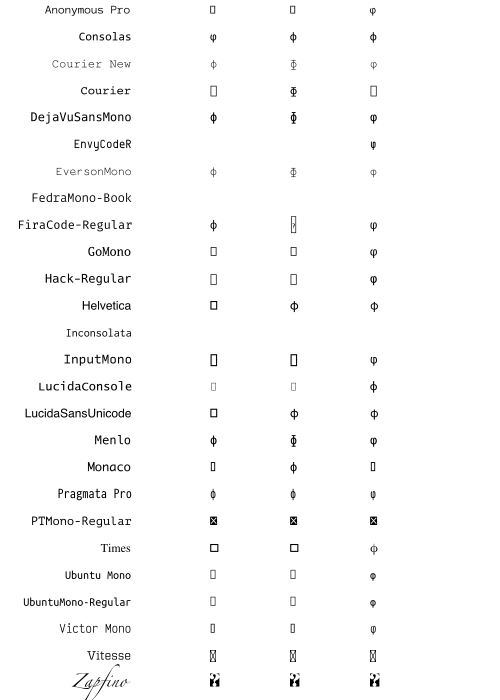

In [11]:
using Luxor

fontlist = [
        "Anonymous Pro", 
        "Consolas", 
        "Courier New", 
        "Courier", 
        "DejaVuSansMono", 
        "EnvyCodeR",
        "EversonMono",
        "FedraMono-Book",
        "FiraCode-Regular",
        "GoMono",
        "Hack-Regular", 
        "Helvetica", 
        "Inconsolata", 
        "InputMono", 
        "LucidaConsole", 
        "LucidaSansUnicode", 
        "Menlo", 
        "Monaco",
        "Pragmata Pro", 
        "PTMono-Regular", 
        "Times", 
        "Ubuntu Mono", 
        "UbuntuMono-Regular",
        "Victor Mono", 
        "Vitesse", 
        "Zapfino"]

d = Drawing(500, 700, :svg)
origin()
fontsize(12)
table = Table(fill(700/length(fontlist), length(fontlist)), [80, 80, 80, 80])
println("         font                  phi         textphi     varphi")
for (i, f) in enumerate(fontlist)
    fontface(f)
    text(f, table[i, 1], halign=:right)
    text("ϕ", table[i, 2])
    text("ɸ", table[i, 3])
    text("φ", table[i, 4])
end
finish()
d

This version of the Consolas font has swapped the `\\phi` and `\\varphi` characters around. There are quite a few boxes and empty spaces here - Luxor/Cairo doesn't invoke the fallback mehanism that you see (but might not notice) in browsers and editors, so if the font doesn't have the character you'll see a box rather than a replacement from another font.